In [37]:
#Daten manipulieren
import pandas as pd
import numpy as np

#Plotting und Visualisierung
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import itertools
#test

In [38]:
#Daten laden
df_store = pd.read_csv("C:/Users/iTTaste/Desktop/DataMining24/data/store.csv", low_memory = False)
df_test = pd.read_csv("C:/Users/iTTaste/Desktop/DataMining24/data/test.csv", low_memory = False)
df_train = pd.read_csv("C:/Users/iTTaste/Desktop/DataMining24/data/train.csv", low_memory = False)


In [39]:
#Überblick verschaffen
print(df_store.head())
print(df_train.head())
print(df_test.head())

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,

In [40]:
# Datentypen und Wertebereiche
print(df_store.info())
print(df_store.describe())
print("-------------------------------------------------------------------------------")
# Datentypen und Wertebereiche
print(df_test.info())
print(df_test.describe())
print("-------------------------------------------------------------------------------")
# Datentypen und Wertebereiche
print(df_train.info())
print(df_train.describe())
print("-------------------------------------------------------------------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
None
            Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.000

In [41]:
# Fehlende Daten df_store
missing_values = df_store.isnull().sum()
print(missing_values)


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


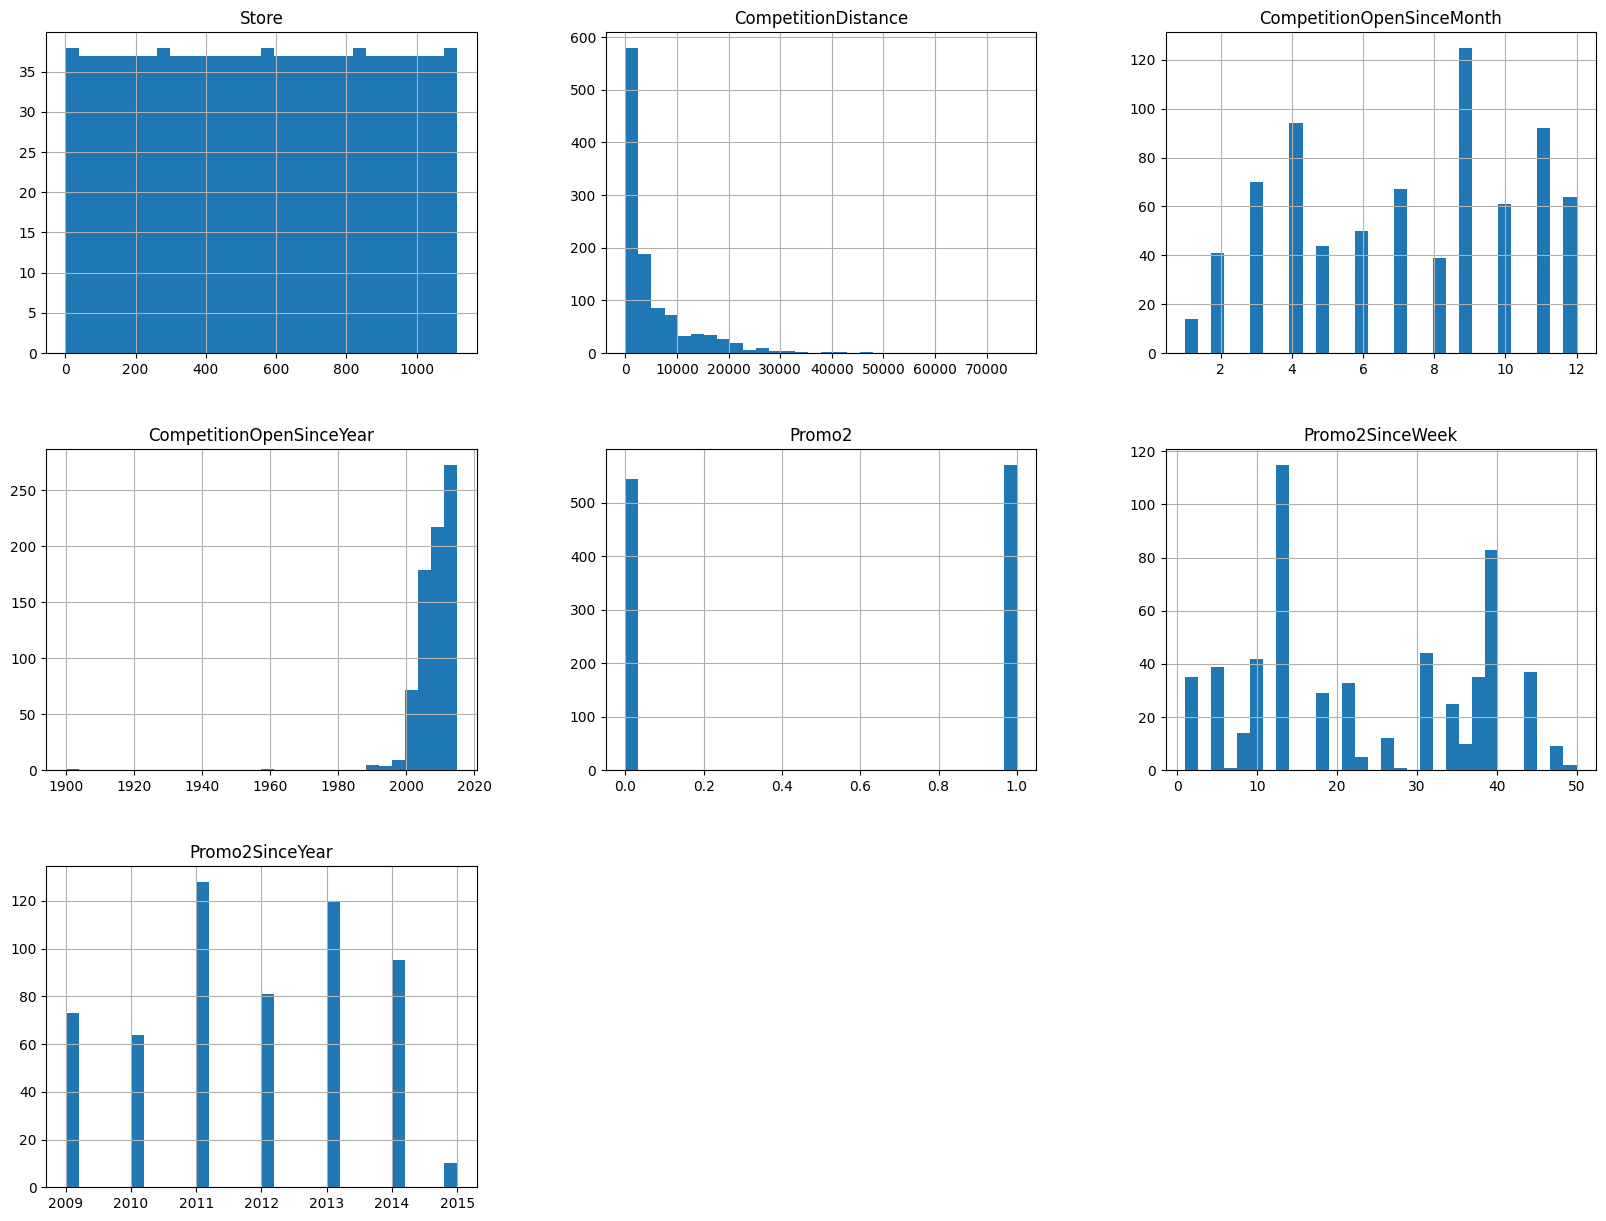

In [42]:
# Verteilung der Daten
df_store.hist(bins=30, figsize=(20, 15))
plt.show()

Mit Store Datensatz anfangen, fehlende Felder/Werte zu befüllen  bzw. löschen

In [43]:
#Prüfen ob fehlende Werte existieren (Füllrate)
df_store.count(0)/df_store.shape[0] * 100

Store                        100.000000
StoreType                    100.000000
Assortment                   100.000000
CompetitionDistance           99.730942
CompetitionOpenSinceMonth     68.251121
CompetitionOpenSinceYear      68.251121
Promo2                       100.000000
Promo2SinceWeek               51.210762
Promo2SinceYear               51.210762
PromoInterval                 51.210762
dtype: float64

In [44]:
#mit CompetitionDistance anfangen und die fehlenden Werte prüfen
df_store[pd.isnull(df_store.CompetitionDistance)] # nur 3 Zeilen sind Null

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [45]:
# Entfernen von Einträgen mit fehlendem CompetitionDistance
df_store_check_distribution = df_store.dropna(subset=['CompetitionDistance'])

Fehlende Werte müssen entweder mit Median oder Mean befüllt werden.
Median, Mean und Std herausfinden und visualisieren!

Text(0.5, 1.0, 'Histogram für naheliegensten Wettbewerber')

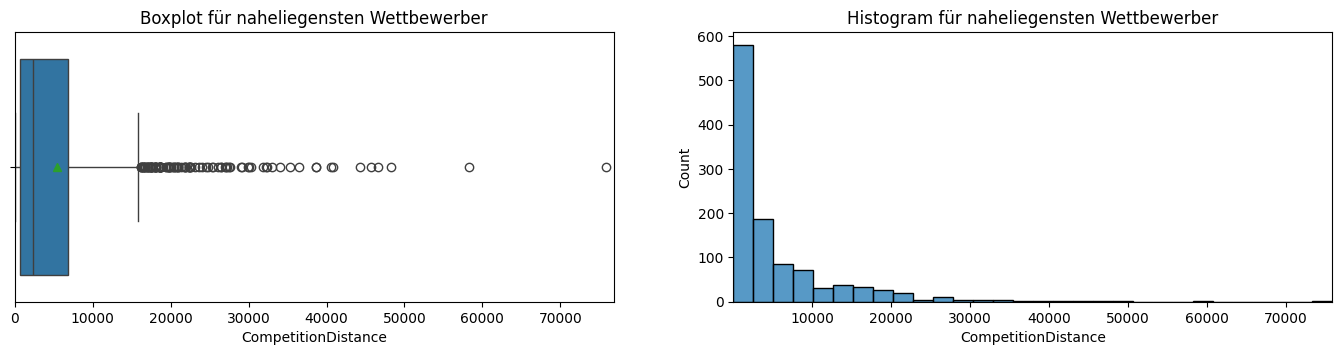

In [46]:
# Statistische Werte berechnen
stats = {
    "Mean": np.nanmean(df_store.CompetitionDistance),
    "Median": np.nanmedian(df_store.CompetitionDistance),
    "Standard Dev": np.nanstd(df_store.CompetitionDistance)
}

# Subplots erstellen
fig, axes = plt.subplots(1, 2, figsize=(17, 3.5))

# Boxplot
sns.boxplot(x=df_store_check_distribution.CompetitionDistance, showmeans=True, ax=axes[0])
axes[0].set_xlim(0, df_store_check_distribution.CompetitionDistance.max() + 1000)
axes[0].set_title('Boxplot für naheliegensten Wettbewerber')

# Histogramm
sns.histplot(df_store_check_distribution.CompetitionDistance, bins=30, ax=axes[1])
axes[1].set_xlim(df_store_check_distribution.CompetitionDistance.min(), df_store_check_distribution.CompetitionDistance.max())
axes[1].set_title("Histogram für naheliegensten Wettbewerber")

Man erkennt eine starke rechtslastige Verteilung der Variable und außerdem einen erheblichen Unterschied zwischen Mittelwert und Median ('Mean': 5404.901079136691, 'Median': 2325.0,'Standard Dev': 7659.7282732764415). Weiterhin ist die Streuung der Daten auf die Std.Abweichung zurückzuführen, die höher als Median und Mittelwert ist.
Es ist daher besser den Median als Ersatzwert einzusetzen, da der Mittelwert von den Außreisern verzerrt wird.

In [47]:
#Ersetze fehlende Werte mit Medianwert
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace = True)

C:\Users\iTTaste\AppData\Local\Temp\ipykernel_27204\2369084995.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace = True)


In [48]:
#Prüfen ob CompetitionDistance bei 100 liegt (Füllrate)
df_store.count(0)/df_store.shape[0] * 100

Store                        100.000000
StoreType                    100.000000
Assortment                   100.000000
CompetitionDistance          100.000000
CompetitionOpenSinceMonth     68.251121
CompetitionOpenSinceYear      68.251121
Promo2                       100.000000
Promo2SinceWeek               51.210762
Promo2SinceYear               51.210762
PromoInterval                 51.210762
dtype: float64

CompetitionOpenSinceMonth und CompetitionOpenSinceYear auf fehlende Werte untersuchen

In [49]:
#da keine näheren infos zu den fehlenden Werten oder ein guter weg diese zu befüllen, gilt es diese mit 0 zu befüllen
df_store.CompetitionOpenSinceMonth.fillna(0, inplace = True)
df_store.CompetitionOpenSinceYear.fillna(0,inplace=True)  

C:\Users\iTTaste\AppData\Local\Temp\ipykernel_27204\1330855194.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_store.CompetitionOpenSinceMonth.fillna(0, inplace = True)
C:\Users\iTTaste\AppData\Local\Temp\ipykernel_27204\1330855194.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

Die 3 Promo-Variablen (Promo2SinceWeek, Promo2SinceYear, PromoInterval) sind noch nicht komplett befüllt.

In [50]:
#3 Promo Variablen noch prüfen
df_store[pd.isnull(df_store.Promo2SinceWeek)]
df_store[pd.isnull(df_store.Promo2SinceWeek) & (df_store.Promo2==0)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,0.0,0.0,0,NaN,NaN,NaN


Alle fehlenden Werte kommen durch Felder bei denen Promo2 = 0 ist, d.h. dort sind keine Promo Aktivitäten am laufen --> keine Promotion = Felder müssen 0 sein, da mit Promo2 verbunden

In [51]:
#Ersetzen der fehlenden Werte mit 0
df_store.Promo2SinceWeek.fillna(0,inplace=True)
df_store.Promo2SinceYear.fillna(0,inplace=True)
df_store.PromoInterval.fillna(0,inplace=True)


C:\Users\iTTaste\AppData\Local\Temp\ipykernel_27204\892025935.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_store.Promo2SinceWeek.fillna(0,inplace=True)
C:\Users\iTTaste\AppData\Local\Temp\ipykernel_27204\892025935.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [52]:
#Prüfung der Füllrate
df_store.count(0)/df_store.shape[0] * 100

Store                        100.0
StoreType                    100.0
Assortment                   100.0
CompetitionDistance          100.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                       100.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64

Keine leeren Fehlder vorhanden, da Füllrate in allen Spalten bei 100% liegt. Weiter mit df_train!
Gleicher Prozess zur Annualisierung der leeren Felder.

In [53]:
#Füllrate von df_train prüfen
df_train.count(0)/df_train.shape[0] * 100

Store            100.0
DayOfWeek        100.0
Date             100.0
Sales            100.0
Customers        100.0
Open             100.0
Promo            100.0
StateHoliday     100.0
SchoolHoliday    100.0
dtype: float64

Füllrate von 100%, keine weiteres Cleaning notwendig. Weiter mit Schließungstage der Geschäfte, da dort keine Verkäufe ergo Gewinne erzielt werden können (Kunden sowie Verkäufe = 0)

In [54]:
# Berechnungen durchführen
closed_stores_total = df_train[df_train.Open == 0].count()[0]
closed_due_to_school_holiday = df_train[(df_train.Open == 0) & (df_train.SchoolHoliday == 1) & (df_train.StateHoliday == '0')].count()[0]
closed_due_to_state_holiday = df_train[(df_train.Open == 0) & (df_train.StateHoliday.isin(['a', 'b', 'c']))].count()[0]
closed_without_reason = df_train[(df_train.Open == 0) & (df_train.StateHoliday == "0") & (df_train.SchoolHoliday == 0)].count()[0]
# Ergebnisse drucken
print()
print(f"- In diesen zwei Jahren, waren {closed_stores_total} verschiedene Filialen an bestimmten Tagen geschlossen.")
print()
print(f"- Von den Schließungen erfolgten {closed_due_to_school_holiday} aufgrund von Schulferien.")
print()
print(f"- Und {closed_due_to_state_holiday} Mal wegen bestimmten Feiertagen oder an Ostern/Weihnachten")
print()
print(f"- Interessanterweise schlossen die Geschäfte, {closed_without_reason} Mal an Tagen ohne ersichtlichen Grund, an denen kein Feiertag angekündigt war. Tatsächlich erfolgten diese Schließungen ohne jegliches Muster und in diesem Fall von 2013 bis 2015 in fast jedem beliebigen Monat und an einem beliebigen Tag.")
print()

C:\Users\iTTaste\AppData\Local\Temp\ipykernel_27204\109749536.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  closed_stores_total = df_train[df_train.Open == 0].count()[0]
C:\Users\iTTaste\AppData\Local\Temp\ipykernel_27204\109749536.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  closed_due_to_school_holiday = df_train[(df_train.Open == 0) & (df_train.SchoolHoliday == 1) & (df_train.StateHoliday == '0')].count()[0]
C:\Users\iTTaste\AppData\Local\Temp\ipykernel_27204\109749536.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be tre


- In diesen zwei Jahren, waren 172817 verschiedene Filialen an bestimmten Tagen geschlossen.

- Von den Schließungen erfolgten 3067 aufgrund von Schulferien.

- Und 30140 Mal wegen bestimmten Feiertagen oder an Ostern/Weihnachten

- Interessanterweise schlossen die Geschäfte, 139610 Mal an Tagen ohne ersichtlichen Grund, an denen kein Feiertag angekündigt war. Tatsächlich erfolgten diese Schließungen ohne jegliches Muster und in diesem Fall von 2013 bis 2015 in fast jedem beliebigen Monat und an einem beliebigen Tag.



C:\Users\iTTaste\AppData\Local\Temp\ipykernel_27204\109749536.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  closed_without_reason = df_train[(df_train.Open == 0) & (df_train.StateHoliday == "0") & (df_train.SchoolHoliday == 0)].count()[0]


In [55]:
#Geschlossene Filialen loswerden, da geschlossen = 0 € Gewinn und daher nicht zu berücksichtigen.
df_train=df_train.drop(df_train[(df_train.Open == 0) & (df_train.Sales == 0)].index)

df_train = df_train.reset_index(drop=True) #sichergehen dass die Indeces zurück auf [0,1,2,3 etc.] gehen.

print ("Unser neuer df_train hat jetzt  {} Reihen ".format(df_train.shape[0]))

Unser neuer df_train hat jetzt  844392 Reihen 


In [56]:
#Gibt es Ausreißer bei der Verteilung der Kunden und Verkaufszahlen in df_train?
df_train.Sales.describe() #ein Minimum von 0 wird hier angezeigt, das bedeutet, dass Filialen trotz Öffnung kein Gewinn erzielt haben

#Filtern nach Filialen die "open" sind aber keine "sales" erzielt haben (open = 1 und sales = 0)
df_train=df_train.drop(df_train[(df_train.Open == 1) & (df_train.Sales == 0)].index)
df_train = df_train.reset_index(drop=True)

{'Mean': 6955.959133664481, 'Median': 6369.0}


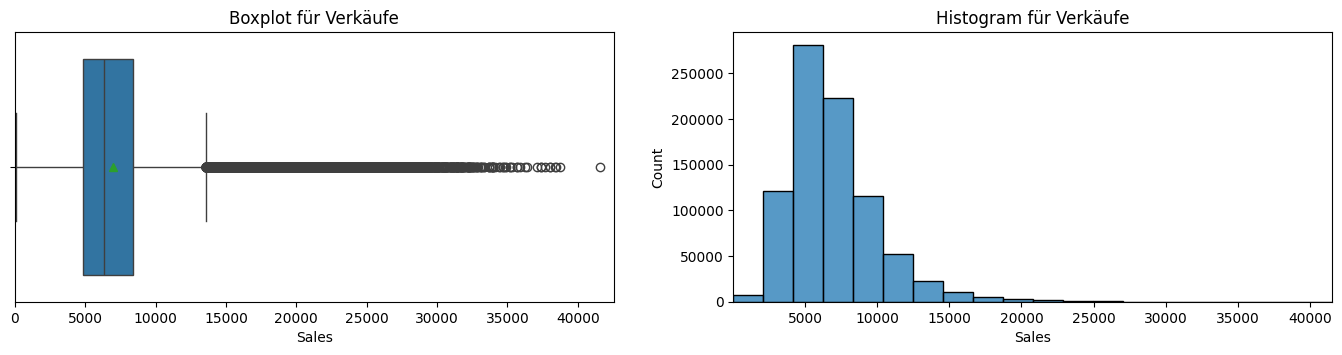

In [57]:
# Berechnung von Mittelwert und Median
stats = {"Mean": df_train.Sales.mean(), "Median": df_train.Sales.median()}

# Erstellen der Subplots
fig, axes = plt.subplots(1, 2, figsize=(17, 3.5))

# Boxplot für die Verkaufswerte
sns.boxplot(x=df_train.Sales, showmeans=True, ax=axes[0])
axes[0].set_title('Boxplot für Verkäufe')
axes[0].set_xlim(0, df_train.Sales.max() + 1000)

# Histogramm der Verkaufswerte
sns.histplot(df_train.Sales, bins=20, ax=axes[1])
axes[1].set_title("Histogram für Verkäufe")
axes[1].set_xlim(df_train.Sales.min(), df_train.Sales.max())

# Statistische Werte ausgeben
print(stats)

# Anzeigen der Plots
plt.show()

In [58]:
df_train.Sales.describe()

count    844338.000000
mean       6955.959134
std        3103.815515
min          46.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

In [59]:
#Prüfen der gefundenen Ausreißern, ob es sich tatsächlich um sehr hohe Gewinne/keine Gewinne handelt oder um falsche Einträge
total_days = df_train.shape[0]
high_sales_days = (df_train.Sales > 14000).sum()
no_sales_days = (df_train.Sales == 0).sum()

print(f"{high_sales_days / total_days * 100:.2f}% der Zeit hat Rossman tatsächlich große Verkaufstage (die als Ausreißer gelten).")
print(f"{no_sales_days / total_days * 100:.2f}% der Zeit, in der Rossman überhaupt keine Verkäufe tätigt.")
print("-----------------------------------------------------------------------------------------------------")
#Doppelte Prüfung des Ausreißers 
df_train[df_train.Customers>7000]

3.21% der Zeit hat Rossman tatsächlich große Verkaufstage (die als Ausreißer gelten).
0.00% der Zeit, in der Rossman überhaupt keine Verkäufe tätigt.
-----------------------------------------------------------------------------------------------------


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
825160,817,2,2013-01-22,27190,7388,1,1,0,0


Korrelation von "Customers" und "Sales" prüfen

In [60]:
# Berechnung der Korrelation mit pandas
correlation = df_train['Customers'].corr(df_train['Sales'])

# Ausgabe der Korrelation
print(f"Correlation (pandas): {correlation:.2f}")


Correlation (pandas): 0.82


- Es wurden ähnliche Muster in den Spalten "Customers" und "Sales" erkannt. Der berechnete Korrelationskoeffizient von 0.82 zeigt eine starke POSITIVE Korrelation zwischen Umsatz und Kunden gibt. "Je mehr Kunden in einem Geschäft, umso höher ist der Umsatz des Tages.

- Es gibt Tage an denen sehr viele Kunden im Geschäft waren, dies ist auf große Promoaktionen zurückzuführen. Diese Werte wirken sich auf den Mittelwert aus und verzerren diesen so, dass sich Mittelwert und Median um 86 unterscheiden.

- Beide Verteilungen weisen eine Rechtsschiefe vor, da die Anzahl an Ausreißern zwar gering ist, jedoch die einzelnen Ausreißer für sich eine hohe Repräsentation aufweist. Dies verschiebt die Verteilung nach links, erkennbar in den Histogrammen. Diese Verschiebung tritt nur dann auf, wenn der Mittelwert höher als der Median ist.